In [26]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"/System/Library/Fonts/STHeiti Light.ttc")

In [2]:
df = pd.read_csv('df_台泥.csv')

In [3]:
df.head(5)

,公司名稱,公司代碼,市場類別,產業類別,職稱,姓名,所代表法人姓名
0,台泥,1101,上市,水泥工業,董事長之法人代表人,張安平,嘉利實業股份有限公司
1,台泥,1101,上市,水泥工業,董事之法人代表人,余俊彥,中成開發投資股份有限公司
2,台泥,1101,上市,水泥工業,董事之法人代表人,辜公怡,泰和興業股份有限公司
3,台泥,1101,上市,水泥工業,董事之法人代表人,李鐘培,財團法人辜公亮文教基金會
4,台泥,1101,上市,水泥工業,董事之法人代表人,王伯元,富品投資股份有限公司


In [27]:
len(df)

533

In [5]:
len(df['公司名稱'].value_counts())

42

In [25]:
sorted(set(list(zip(df['公司名稱'],df['產業類別']))), key=lambda x: x[1])

[('友輝', '光電業'),
 ('中聯資源', '其他業'),
 ('崑鼎', '其他業'),
 ('中鼎', '其他業'),
 ('中碳', '化學工業'),
 ('信昌化', '化學工業'),
 ('國碳科', '化學工業'),
 ('東聯', '化學工業'),
 ('合晶', '半導體業'),
 ('國際中橡', '橡膠工業'),
 ('亞泥', '水泥工業'),
 ('東泥', '水泥工業'),
 ('台泥', '水泥工業'),
 ('嘉泥', '水泥工業'),
 ('大台北', '油電燃氣業'),
 ('欣天然', '油電燃氣業'),
 ('新海', '油電燃氣業'),
 ('華廣', '生技醫療業'),
 ('展旺', '生技醫療業'),
 ('新纖', '紡織纖維'),
 ('遠東新', '紡織纖維'),
 ('新紡', '紡織纖維'),
 ('裕民', '航運業'),
 ('台船', '航運業'),
 ('遠百', '貿易百貨業'),
 ('新鼎', '資訊服務業'),
 ('遠傳', '通信網路業'),
 ('亞太電', '通信網路業'),
 ('華票', '金融保險業'),
 ('王道銀行', '金融保險業'),
 ('遠東銀', '金融保險業'),
 ('第一銅', '鋼鐵工業'),
 ('中鋼構', '鋼鐵工業'),
 ('唐榮', '鋼鐵工業'),
 ('中鋼', '鋼鐵工業'),
 ('中鴻', '鋼鐵工業'),
 ('春雨', '鋼鐵工業'),
 ('春源', '鋼鐵工業'),
 ('聲寶', '電器電纜'),
 ('華榮', '電器電纜'),
 ('瑞智', '電機機械'),
 ('中宇', '電機機械')]

In [8]:
df2 = df[df['所代表法人姓名']!='無']

In [10]:
cement = list(zip(df2['公司名稱'],df2['所代表法人姓名']))
cement[:5]

[('台泥', '嘉利實業股份有限公司'),
 ('台泥', '中成開發投資股份有限公司'),
 ('台泥', '泰和興業股份有限公司'),
 ('台泥', '財團法人辜公亮文教基金會'),
 ('台泥', '富品投資股份有限公司')]

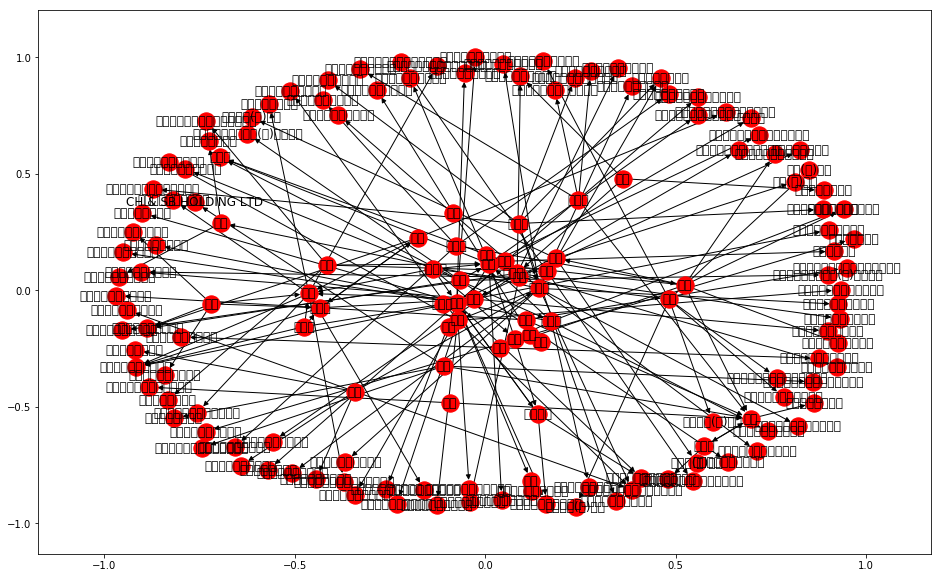

In [32]:
G = nx.DiGraph()
G.add_edges_from(cement)
nx.draw_networkx(G, with_labels=True, font_family='STHeiti Light')
# nx.draw_networkx_labels(G, font_size=15, font_family ='STHeiti Light.ttc')
plt.gcf().set_size_inches(16,10)
# plt.xticks(fontproperties=font)
# plt.yticks(fontproperties=font)
plt.show()

In [37]:
sorted(G.degree, key=lambda x: x[1], reverse=True)[0:10]

[('台泥', 16),
 ('亞泥', 14),
 ('中鋼', 14),
 ('大台北', 14),
 ('新纖', 9),
 ('王道銀行', 8),
 ('遠東新', 8),
 ('裕民', 8),
 ('中宇', 8),
 ('華榮', 8)]

In [38]:
sorted(G.in_degree, key=lambda x: x[1], reverse=True)[0:10]

[('中鋼', 8),
 ('亞泥', 6),
 ('華榮', 6),
 ('台泥', 4),
 ('遠東新', 4),
 ('裕鼎實業股份有限公司', 4),
 ('新纖', 3),
 ('財團法人新光吳火獅文教基金會', 3),
 ('中鼎', 3),
 ('經濟部', 3)]

In [39]:
sorted(G.out_degree, key=lambda x: x[1], reverse=True)[0:10]

[('台泥', 12),
 ('大台北', 12),
 ('亞泥', 8),
 ('王道銀行', 7),
 ('中聯資源', 7),
 ('欣天然', 7),
 ('中宇', 7),
 ('新纖', 6),
 ('中鋼構', 6),
 ('中鋼', 6)]

## EDA Measure

In [116]:
# 整張圖的平均最短距離
nx.average_shortest_path_length(G)

5.2383498854087085

In [117]:
# 直徑
nx.diameter(G)

10

In [11]:
# 半徑
nx.radius(G)

5

In [118]:
# 中心點
nx.center(G)

['中聯資源']

In [9]:
# 邊緣點，最大的Eccentricity的點
nx.periphery(G)[:10]

['欣田崎生化科技股份有限公司',
 '國軍退除役官兵輔導委員會',
 '欣欣客運股份有限公司',
 '通產企業股份有限公司',
 '新海瓦斯股份有限公司',
 '朋萊股份有限公司',
 '工興實業股份有限公司',
 '光偉投資股份有限公司',
 '欣淼投資股份有限公司',
 '濟真股份有限公司']

In [16]:
# 拿掉哪個點會造成圖的不聯通
nx.minimum_node_cut(G)

{'中鋼'}

In [19]:
# 拿掉哪個邊會造成圖的不聯通
nx.minimum_edge_cut(G)

{('中鋼', '高瑞投資股份有限公司')}

# Centrality

In [13]:
degCent = nx.degree_centrality(G)
sorted(degCent.items(), key=lambda x: x[1], reverse=True)[:5]

[('台泥', 0.09803921568627451),
 ('中鋼', 0.09150326797385622),
 ('大台北', 0.09150326797385622),
 ('亞泥', 0.08496732026143791),
 ('新纖', 0.058823529411764705)]

In [14]:
closeCent = nx.closeness_centrality(G, wf_improved=False)
sorted(closeCent.items(), key=lambda x: x[1], reverse=True)[:5]

[('中聯資源', 0.3227848101265823),
 ('中鋼', 0.30297029702970296),
 ('台泥', 0.2953667953667954),
 ('中碳', 0.2781818181818182),
 ('中鋼構', 0.2756756756756757)]

In [15]:
btwnCent = nx.betweenness_centrality(G)
sorted(btwnCent.items(), key=lambda x: x[1], reverse=True)[:5]

[('中聯資源', 0.6111397775484461),
 ('台泥', 0.5233058135534916),
 ('中鋼', 0.5145625501662652),
 ('中宇', 0.35178018575851394),
 ('新纖', 0.3394392844857241)]

In [17]:
btwnCent_edge = nx.edge_betweenness_centrality(G)
sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:5]

[('大台北', 0.03777290022404491),
 ('台泥', 0.03765859826090169),
 ('中鋼', 0.03339921208960174),
 ('亞泥', 0.027759333134667052),
 ('新纖', 0.024369530637124995)]

In [16]:
pagerank = nx.pagerank(G)
sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:5]

[('大台北', 0.03777290022404491),
 ('台泥', 0.03765859826090169),
 ('中鋼', 0.03339921208960174),
 ('亞泥', 0.027759333134667052),
 ('新纖', 0.024369530637124995)]

# Link prediction

In [128]:
import operator
common_neigh = [(e[0], e[1], len(list(nx.common_neighbors(G, e[0], e[1])))) for e in nx.non_edges(G)]
sorted(common_neigh, key=operator.itemgetter(2), reverse=True)[:5]

[('遠百', '東聯', 3),
 ('富品投資股份有限公司', '中信投資股份有限公司', 2),
 ('遠東新', '裕利投資股份有限公司', 2),
 ('台船', '唐榮', 2),
 ('中碳', '台泥', 2)]

In [129]:
# 很多1分的 不適用
L = list(nx.jaccard_coefficient(G))
L.sort(key=operator.itemgetter(2), reverse = True)
L[:10]

[('財團法人東南文化基金會', '東樹投資股份有限公司', 1.0),
 ('財團法人東南文化基金會', '東樹投資(股)公司', 1.0),
 ('財團法人東南文化基金會', '財團法人陳趙樹公益慈善基金會', 1.0),
 ('財團法人東南文化基金會', '長青(股)公司', 1.0),
 ('財團法人東南文化基金會', '立凱投資(股)公司', 1.0),
 ('台灣新光實業股份有限公司', '友輝', 1.0),
 ('台灣新光實業股份有限公司', '進賢投資股份有限公司', 1.0),
 ('台灣新光實業股份有限公司', '德岳實業股份有限公司', 1.0),
 ('台灣新光實業股份有限公司', '新光開發股份有限公司', 1.0),
 ('台灣新光實業股份有限公司', '綿豪實業股份有限公司', 1.0)]

In [130]:
L = list(nx.resource_allocation_index(G))
L.sort(key=operator.itemgetter(2), reverse=True)
L[:5]

[('遠百', '東聯', 0.5769230769230769),
 ('中宇', '中鋼構', 0.5714285714285714),
 ('中鼎', '柏惠投資股份有限公司', 0.5),
 ('三菱伸銅株式會社', '華榮', 0.5),
 ('嘉新國際股份有限公司', '台泥', 0.5)]

In [131]:
L = list(nx.adamic_adar_index(G))
L.sort(key=operator.itemgetter(2), reverse=True)
L[:5]

[('遠百', '東聯', 1.8582210984293646),
 ('中宇', '中鋼構', 1.8216182225789146),
 ('中鼎', '柏惠投資股份有限公司', 1.4426950408889634),
 ('三菱伸銅株式會社', '華榮', 1.4426950408889634),
 ('嘉新國際股份有限公司', '台泥', 1.4426950408889634)]

In [132]:
L = list(nx.preferential_attachment(G))
L.sort(key=operator.itemgetter(2), reverse=True)
L[:5]

[('台泥', '大台北', 210),
 ('台泥', '中鋼', 210),
 ('中鋼', '大台北', 196),
 ('亞泥', '台泥', 195),
 ('亞泥', '中鋼', 182)]

### 加入產業類別

In [13]:
df2['產業類別'].unique()

array(['水泥工業', '橡膠工業', '紡織纖維', '金融保險業', '化學工業', '其他業', '光電業', '油電燃氣業',
       '鋼鐵工業', '貿易百貨業', '航運業', '電機機械', '資訊服務業', '通信網路業', '電器電纜', '生技醫療業',
       '半導體業'], dtype=object)

In [12]:
df2['產業類別2'] = df2['產業類別'].astype('category').cat.codes

/Users/andy/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [51]:
df2.head()

,公司名稱,公司代碼,市場類別,產業類別,職稱,姓名,所代表法人姓名,產業類別2
0,台泥,1101,上市,水泥工業,董事長之法人代表人,張安平,嘉利實業股份有限公司,5
1,台泥,1101,上市,水泥工業,董事之法人代表人,余俊彥,中成開發投資股份有限公司,5
2,台泥,1101,上市,水泥工業,董事之法人代表人,辜公怡,泰和興業股份有限公司,5
3,台泥,1101,上市,水泥工業,董事之法人代表人,李鐘培,財團法人辜公亮文教基金會,5
4,台泥,1101,上市,水泥工業,董事之法人代表人,王伯元,富品投資股份有限公司,5


In [101]:
for i in df2['公司名稱'].unique():
    print("G.node["+"'"+i+"'"+"]['community']"+"="+str(int(df2[df2['公司名稱'] == i]['產業類別2'].head(1))))

G.node['台泥']['community']=5
G.node['國際中橡']['community']=4
G.node['嘉泥']['community']=5
G.node['新纖']['community']=8
G.node['王道銀行']['community']=13
G.node['信昌化']['community']=2
G.node['中聯資源']['community']=1
G.node['中碳']['community']=2
G.node['友輝']['community']=0
G.node['大台北']['community']=6
G.node['華票']['community']=13
G.node['中鋼構']['community']=14
G.node['欣天然']['community']=6
G.node['新海']['community']=6
G.node['亞泥']['community']=5
G.node['中鋼']['community']=14
G.node['東泥']['community']=5
G.node['中鼎']['community']=1
G.node['新紡']['community']=8
G.node['遠東新']['community']=8
G.node['遠百']['community']=10
G.node['裕民']['community']=9
G.node['東聯']['community']=2
G.node['遠東銀']['community']=13
G.node['中宇']['community']=16
G.node['中鴻']['community']=14
G.node['唐榮']['community']=14
G.node['台船']['community']=9
G.node['瑞智']['community']=16
G.node['新鼎']['community']=11
G.node['崑鼎']['community']=1
G.node['遠傳']['community']=12
G.node['國碳科']['community']=2
G.node['春源']['community']=14
G.node['華榮']['communit

In [ ]:
G.node['A']['community'] = 0

In [83]:
for i in df2['公司名稱'].unique():
    print(G.node[i]['community'])

5
4
5
8
13
2
1
2
0
6
13
14
6
6
5
14
5
1
8
8
10
9
2
13
16
14
14
9
16
11
1
12
2
14
15
14
15
14
12
7
7
3


In [113]:
G.node['台泥']['community']=5
G.node['國際中橡']['community']=4
G.node['嘉泥']['community']=5
G.node['新纖']['community']=8
G.node['王道銀行']['community']=13
G.node['信昌化']['community']=2
G.node['中聯資源']['community']=1
G.node['中碳']['community']=2
G.node['友輝']['community']=0
G.node['大台北']['community']=6
G.node['華票']['community']=13
G.node['中鋼構']['community']=14
G.node['欣天然']['community']=6
G.node['新海']['community']=6
G.node['亞泥']['community']=5
G.node['中鋼']['community']=14
G.node['東泥']['community']=5
G.node['中鼎']['community']=1
G.node['新紡']['community']=8
G.node['遠東新']['community']=8
G.node['遠百']['community']=10
G.node['裕民']['community']=9
G.node['東聯']['community']=2
G.node['遠東銀']['community']=13
G.node['中宇']['community']=16
G.node['中鴻']['community']=14
G.node['唐榮']['community']=14
G.node['台船']['community']=9
G.node['瑞智']['community']=16
G.node['新鼎']['community']=11
G.node['崑鼎']['community']=1
G.node['遠傳']['community']=12
G.node['國碳科']['community']=2
G.node['春源']['community']=14
G.node['華榮']['community']=15
G.node['春雨']['community']=14
G.node['聲寶']['community']=15
G.node['第一銅']['community']=14
G.node['亞太電']['community']=12
G.node['展旺']['community']=7
G.node['華廣']['community']=7
G.node['合晶']['community']=3

In [114]:
import operator
L = list(nx.cn_soundarajan_hopcroft(G))
L.sort(key=operator.itemgetter(2), reverse=True)
print(L[:5])

NetworkXNotImplemented: not implemented for directed type

In [105]:
L = list(nx.ra_index_soundarajan_hopcroft(G))
L.sort(key=operator.itemgetter(2), reverse=True)
L

NetworkXAlgorithmError: No community information